# Taller 5 - Morfología matemática

# Punto 1 - Operadores de dilatación y erosión

**Integrantes - Grupo 9**

Santiago Tinjacá Roncancio

## 0. Inicialización

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import dilation, erosion, opening, closing, rectangle

## 1. Operadores de dilatación y erosión

### 1.1 Cargado y visualización de la imagen

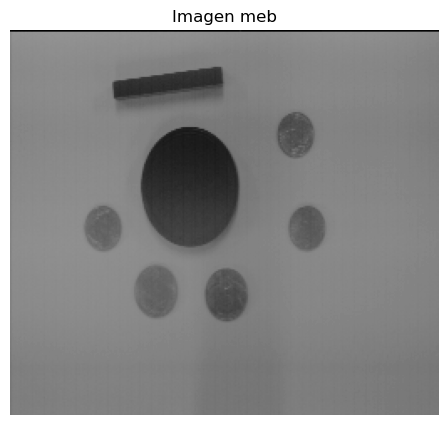

In [ ]:
ruta_morpho = './images/morpho.png'
img_morpho = cv2.imread(ruta_morpho, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_morpho, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen morpho')
ax.axis('off')
plt.show()

### 1.2 Umbralización de esta imagen, para obtener objetos negros sobre fondo blanco (umbral alrededor de 115).



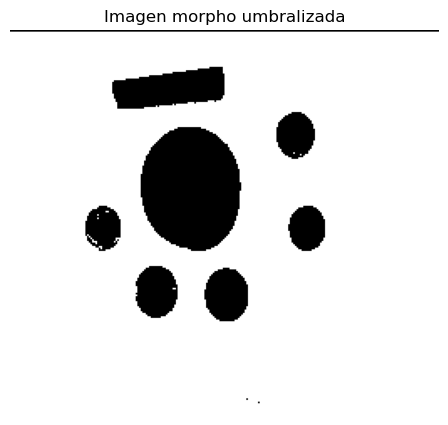

In [14]:
img_morpho_bin = cv2.threshold(img_morpho, 114, 255, cv2.THRESH_BINARY)[1]
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_morpho_bin, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen morpho umbralizada')
ax.axis('off')
plt.show()

### 1.3 Dilatación con un elemento estructurante o máscara cuadrada de 29x29.

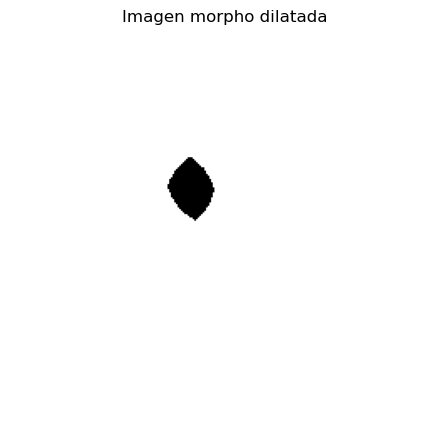

In [ ]:
fp = rectangle(29, 29)

dilated_image = dilation(img_morpho_bin, footprint=fp)
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(dilated_image, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen morpho dilatada')
ax.axis('off')
plt.show()

**¿Qué obtiene como resultado?**

El resultado obtenido es la eliminación de todos los objetos en la imagen que tienen un tamaño menor o igual a 29 píxeles, dejando únicamente el objeto más grande. Sin embargo, debido al proceso de erosión, la forma del objeto restante puede verse afectada. En este caso, el objeto grande adopta una apariencia de rombo con bordes suavizados.

### 1.4 Sobre la imagen resultante, Erosión con la misma máscara

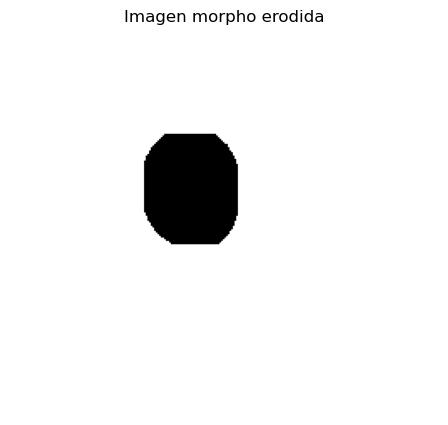

In [21]:
erosioned_image = erosion(dilated_image, footprint=fp)
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(erosioned_image, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen morpho erodida')
ax.axis('off')
plt.show()

**¿Cómo es el objeto obtenido con respecto al original?**

El objeto obtenido depsues de la erocion ws un cuadrado con esquinas suavizadas. Esto ocurre porque el rombo obtenido en el paso anterior se expandió usando la misma máscara.

En comparación con el original, la forma general se mantiene, pero los detalles específicos se han perdido, haciendo que el resultado final se vea bastante diferente.

### 1.5 Sobre la imagen resultado del punto anterior,Erosión con una máscara en cruz, de tamaño 11x11. 

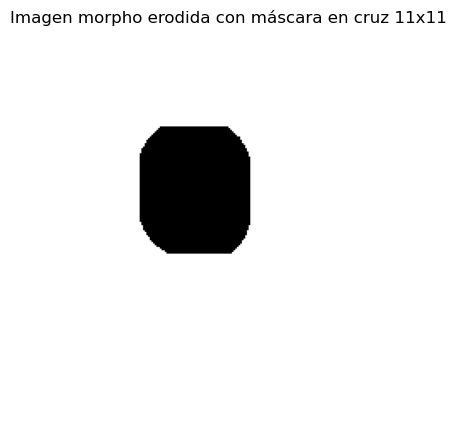

In [45]:
def create_cross_mask(size):
    mask = np.full((size, size), np.nan)
    center = size // 2
    mask[center, :] = 1
    mask[:, center] = 1
    return mask

cross_mask = create_cross_mask(11)

erosion_cross_image = erosion(erosioned_image, footprint=cross_mask)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(erosion_cross_image, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen morpho erodida con máscara en cruz 11x11')
ax.axis('off')
plt.show()

### 1.6 Máximo entre última imagen e imagen original umbralizada.

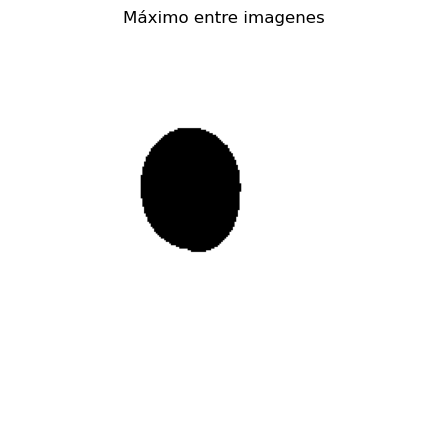

In [46]:
max_image = np.maximum(erosion_cross_image, img_morpho_bin)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(max_image, cmap='gray', vmin=0, vmax=255)
ax.set_title('Máximo entre imagenes')
ax.axis('off')
plt.show()

**¿Cómo es el resultado obtenido?**
El resultado es una máscara que se asemeja mucho, si no es que es idéntica, a la forma original del objeto central. Esto ocurre porque al calcular el máximo entre la imagen final y la imagen umbralizada, se recuperan los detalles y bordes que pudieron haberse perdido durante las operaciones previas, restaurando la forma original del objeto.

### 1.7  Operaciones 1 a 4, trabajando directamente con la imagen original no umbralizada (en niveles de gris).

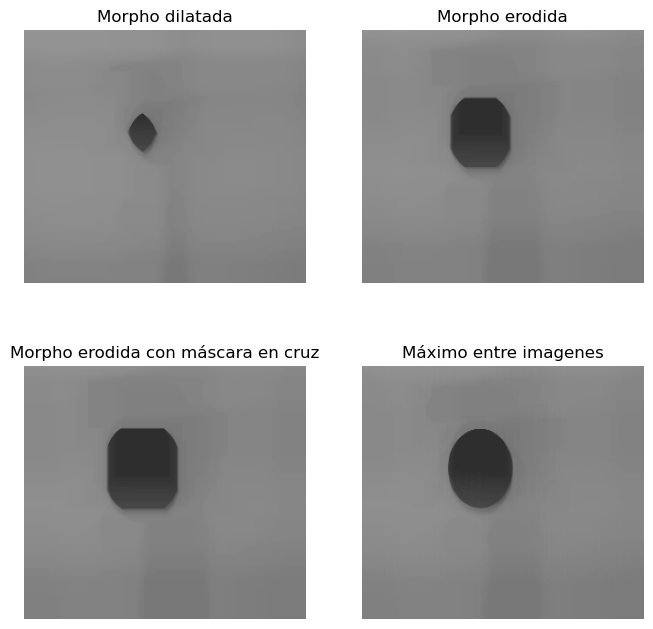

In [47]:
# Dilatación con un elemento estructurante o máscara cuadrada de 29x29
dilated_image_gray = dilation(img_morpho, footprint=fp)
fig, ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].imshow(dilated_image_gray, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('Morpho dilatada')
ax[0,0].axis('off')

# Erosión con la misma máscara
erosioned_image_gray = erosion(dilated_image_gray, footprint=fp)
ax[0,1].imshow(erosioned_image_gray, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title('Morpho erodida')
ax[0,1].axis('off')

# Erosión con una máscara en cruz, de tamaño 11x11
erosion_cross_image_gray = erosion(erosioned_image_gray, footprint=cross_mask)
ax[1,0].imshow(erosion_cross_image_gray, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('Morpho erodida con máscara en cruz')
ax[1,0].axis('off')

# Máximo entre última imagen e imagen original
max_image_gray = np.maximum(erosion_cross_image_gray, img_morpho)
ax[1,1].imshow(max_image_gray, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title('Máximo entre imagenes')
ax[1,1].axis('off')

plt.show()

**¿Cómo funcionan las operaciones de erosión y de dilatación en imágenes en niveles de gris?**

Las operaciones de erosión y dilatación en imágenes en niveles de gris modifican la intensidad de los píxeles en función de su vecindario, utilizando un elemento estructurante.

Erosión en imágenes en niveles de gris: Reduce el brillo de las regiones claras y atenúa los detalles brillantes. Las áreas oscuras tienden a expandirse, suavizando los cambios de intensidad y difuminando los bordes. Como resultado, las estructuras brillantes pueden reducirse o incluso desaparecer si son más pequeñas que la máscara utilizada.

Dilatación en imágenes en niveles de gris: Aumenta el brillo de las regiones claras y reduce el tamaño de las áreas oscuras. Los detalles brillantes se expanden, lo que ayuda a resaltar estructuras claras y rellenar huecos en regiones iluminadas.

En imágenes binarias:

La erosión reduce el tamaño de los objetos blancos, elimina pequeñas estructuras blancas menores que la máscara y hace que las regiones negras se expandan.
La dilatación expande los objetos blancos, rellenando huecos y reduciendo las áreas negras.

**¿Cómo es el resultado obtenido sobre la imagen en niveles de gris, comparado con el resultado sobre la imagen binaria?**

El resultado obtenido es satisfactorio en ambos casos, ya que el objeto grande del centro pudo ser aislado del resto de los elementos en la imagen.

En la imagen binaria, la erosión conserva mejor la forma original del objeto, incluyendo pequeños detalles como la protuberancia que le da su forma ovalada. Esto se debe a que los píxeles solo pueden ser completamente eliminados o conservados, manteniendo los contornos más definidos.

En la imagen en niveles de gris, la erosión no solo reduce el tamaño del objeto, sino que también suaviza los bordes y difumina los detalles debido a la transición gradual de intensidades. Como resultado, el objeto tiende a redondearse y perder características más pequeñas que estaban presentes en la imagen binaria.